# Valenspy workflow

A basic but complete Valenspy workflow.

The goal of this workflow is to illustrate the full pipeline of a Valenspy workflow. 
We will create a bias map of the mean daily temperature in Belgium in July 2018.

For this, we will use an ALARO model simulations and the CLIMATE_GRID observational reference data. 

### 0. Loading packages

We start at the very beginning: by importing the valenspy python package

In [1]:
import valenspy as vp

## 1. Input
Then we'll load input data for both the simulation and the reference data. 

For this, we need the valenspy **InputManager**. See notebook [2 Input](2_input.ipynb) for more detailed information.

In [2]:
machine = 'hortense' # define the machine name

manager = vp.InputManager(machine=machine) #Create the input manager

### 1.1 Climate grid data

We will start with daily mean temperature from the CLIMATE GRID dataset. This is a gridded dataset, provided by RMI, that provides daily data for Belgium harmonized based on point stations at a 5 km resolution.

The version we will load here, is regridded to a regular lat-lon grid corresponding to a 5 km grid space. 

You can download this dataset yourself on the [website of the Belgian climate center](https://www.climatecentre.be/post/historical-climate-data-now-available-to-researchers-in-collaboration-between-the-belgian-climate-ce), but we already provided a nice gridded netcdf to load! 

Here, we use the InputManager to load the CLIMATE_GRID dataset, based on some characteristics we provide to the function.  

Inside, the input manager will look for these characteristics to find the file name, but more on that in the more detailed input notebook. 

Here we'll load daily temperature (tas).

In [3]:
# define dataset name
dataset = "CLIMATE_GRID"
variable = "tas" # 2 m temperature 

ds_ref = manager.load_data(dataset, variable, path_identifiers=["latlon_5km"])

File paths found:
/dodrio/scratch/projects/2022_200/external/climate_grid/regridded/latlon_5km/TEMP_AVG_CLIMATE_GRID_1954_2023_daily_latlon_5km.nc
The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']


Now, the following has happened: the valenspy input manager has searched (and found!) for a file with the identifiers above, the file path is printed above. 

Then, it has loaded the netcdf file into an xarray dataset object (ds). 

Next, it has checked the variable name and units and if necessary converted the units and renamed the variable to the standard CORDEX nameing (more details in the input notebook)

Finally, valenspy has checked whether the file complies with CF standards (whether the file follows the CF conventions). But no need to worry about this now. 

Let's check out the resulting dataset! Look at the dimensions, variables included and don't forget to peek at the attributes

In [21]:
ds_ref

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 25567, lon: 75, lat: 70)
Coordinates:
  * time     (time) datetime64[ns] 205kB 1954-01-01 1954-01-02 ... 2023-12-31
  * lon      (lon) float64 600B 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat      (lat) float64 560B 49.0 49.05 49.09 49.13 ... 52.02 52.06 52.1
Data variables:
    tas      (time, lat, lon) float64 1GB dask.array<chunksize=(13334, 34, 37), meta=np.ndarray>
Attributes:
    CDI:               Climate Data Interface version 1.9.9 (https://mpimet.m...
    Conventions:       CF-1.6
    creation_date:     25-06-2024
    creators:          Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:           inne.vanderkelen@meteo.be
    version:           1.1
    affiliation:       Royal Meteorological Institute of Belgium
    projection:        +proj=lcc +lat_2=50.569898649999999 +lat_1=50.56989864...
    history:           Tue Jun 25 14:36:08 2024: cdo remapcon,latlon_5km.txt ...
    CDO:               Climate Data Operators version 1.9.9 (https://mpimet.m...
    path_identifiers:  ['latlon_5km']
    dataset:           CLIMATE_GRID

Now we will access the tas variable as an xarray data array and look at its properties

In [23]:
da_ref = ds_ref['tas']
da_ref

<xarray.DataArray 'tas' (time: 25567, lat: 70, lon: 75)> Size: 1GB
dask.array<add, shape=(25567, 70, 75), dtype=float64, chunksize=(13334, 34, 37), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 205kB 1954-01-01 1954-01-02 ... 2023-12-31
  * lon      (lon) float64 600B 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat      (lat) float64 560B 49.0 49.05 49.09 49.13 ... 52.02 52.06 52.1
Attributes:
    long_name:           Near-Surface Air Temperature
    units:               K
    description:         nan
    standard_name:       air_temperature
    original_name:       TEMP_AVG
    original_long_name:  Near-Surface Air Temperature
    original_units:      degC
    path_identifiers:    ['latlon_5km']
    dataset:             CLIMATE_GRID
    freq:                daily

To get a feel how this data looks like, we can select and plot the first timestep

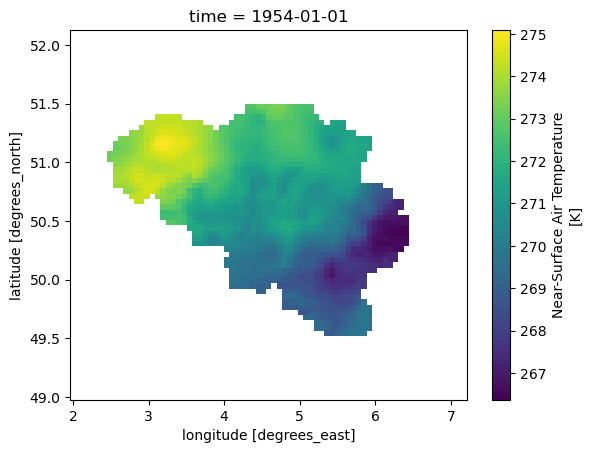

In [24]:
da_ref.isel(time=0).plot()

Neat, isn't it?! Now it is time to load the ALARO model data

In [25]:
# This is for you, Kobe!

## 2. Processing

We eventually want a bias map of the mean temperature in July 2018. For this, processing steps need to happen. 

Several options are possible: selecting a domain, time period, resampling, regridding and selecting a point. A couple of these functions can be easily done using xarray functions, but for more complex preprocessing steps other functions like regridding and point selection, valenspy provides ready made functions. More on this in the processing notebook!

First, we just want to select the month July of 1998. For this we can use standard xarray functions

In [26]:
ds_ref_sel = ds_ref.sel(time='07-2018')

ds_ref_sel

<xarray.Dataset> Size: 1MB
Dimensions:  (time: 31, lon: 75, lat: 70)
Coordinates:
  * time     (time) datetime64[ns] 248B 2018-07-01 2018-07-02 ... 2018-07-31
  * lon      (lon) float64 600B 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat      (lat) float64 560B 49.0 49.05 49.09 49.13 ... 52.02 52.06 52.1
Data variables:
    tas      (time, lat, lon) float64 1MB dask.array<chunksize=(31, 34, 37), meta=np.ndarray>
Attributes:
    CDI:               Climate Data Interface version 1.9.9 (https://mpimet.m...
    Conventions:       CF-1.6
    creation_date:     25-06-2024
    creators:          Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:           inne.vanderkelen@meteo.be
    version:           1.1
    affiliation:       Royal Meteorological Institute of Belgium
    projection:        +proj=lcc +lat_2=50.569898649999999 +lat_1=50.56989864...
    history:           Tue Jun 25 14:36:08 2024: cdo remapcon,latlon_5km.txt ...
    CDO:               Climate Data Operators version 1.9.9 (https://mpimet.m...
    path_identifiers:  ['latlon_5km']
    dataset:           CLIMATE_GRID

and if we look at the time coordinate in detail, we can indeed see that only july 2018 is retained!

In [28]:
ds_ref_sel.time

<xarray.DataArray 'time' (time: 31)> Size: 248B
array(['2018-07-01T00:00:00.000000000', '2018-07-02T00:00:00.000000000',
       '2018-07-03T00:00:00.000000000', '2018-07-04T00:00:00.000000000',
       '2018-07-05T00:00:00.000000000', '2018-07-06T00:00:00.000000000',
       '2018-07-07T00:00:00.000000000', '2018-07-08T00:00:00.000000000',
       '2018-07-09T00:00:00.000000000', '2018-07-10T00:00:00.000000000',
       '2018-07-11T00:00:00.000000000', '2018-07-12T00:00:00.000000000',
       '2018-07-13T00:00:00.000000000', '2018-07-14T00:00:00.000000000',
       '2018-07-15T00:00:00.000000000', '2018-07-16T00:00:00.000000000',
       '2018-07-17T00:00:00.000000000', '2018-07-18T00:00:00.000000000',
       '2018-07-19T00:00:00.000000000', '2018-07-20T00:00:00.000000000',
       '2018-07-21T00:00:00.000000000', '2018-07-22T00:00:00.000000000',
       '2018-07-23T00:00:00.000000000', '2018-07-24T00:00:00.000000000',
       '2018-07-25T00:00:00.000000000', '2018-07-26T00:00:00.000000000',
       '2018-07-27T00:00:00.000000000', '2018-07-28T00:00:00.000000000',
       '2018-07-29T00:00:00.000000000', '2018-07-30T00:00:00.000000000',
       '2018-07-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 248B 2018-07-01 2018-07-02 ... 2018-07-31
Attributes:
    standard_name:  time
    axis:           T

## 3. Diagnostic

Based on the preprocessed datasets of model and observations, we now want to calculate a diagnostic, here the monthly mean, and visualize it in a nice map. 

For this, we load the diagnostic object SpatialBias, and print its description to the screen. 

In [31]:
from valenspy.diagnostic import SpatialBias
print(SpatialBias.description)

Spatial Bias (Model2Ref)
The spatial bias of the data compared to the reference.
 Diagnostic function: spatial_bias
 Calculate the spatial bias of the data compared to the reference. The time dimensions are averaged over if present.

    Parameters
    ----------
    ds : xr.Dataset
        The data to calculate the spatial bias of.
    ref : xr.Dataset or xr.DataArray
        The reference data to compare the data to.
    calc_relative : bool, optional
        If True, return the relative bias, if False return the absolute bias, by default False

    Returns
    -------
    xr.Dataset or xr.DataArray
        The spatial bias of the data compared to the reference.
    
 Visualization function: plot_spatial_bias
 
    Plot the spatial bias of a given data array on a map.

    Parameters
    ----------
    da : xarray.DataArray
        The DataArray containing the bias data to be plotted. It is assumed that the data represents some
        form of spatial bias, and the plot will visualiz

This diagnostic object uses underlying functions to calculate the mean bias over the time dimension based on the two inputs. It returns a dataset with the resulting calculation. Let's check it out. 

In [34]:
ds_spatialbias = SpatialBias.apply(ds_ref_sel, ds_ref_sel).compute() #As this is a dask array, nothing is computed until we call the compute method
ds_spatialbias

<xarray.Dataset> Size: 43kB
Dimensions:  (lon: 75, lat: 70)
Coordinates:
  * lon      (lon) float64 600B 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat      (lat) float64 560B 49.0 49.05 49.09 49.13 ... 52.02 52.06 52.1
Data variables:
    tas      (lat, lon) float64 42kB nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:               Climate Data Interface version 1.9.9 (https://mpimet.m...
    Conventions:       CF-1.6
    creation_date:     25-06-2024
    creators:          Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:           inne.vanderkelen@meteo.be
    version:           1.1
    affiliation:       Royal Meteorological Institute of Belgium
    projection:        +proj=lcc +lat_2=50.569898649999999 +lat_1=50.56989864...
    history:           Tue Jun 25 14:36:08 2024: cdo remapcon,latlon_5km.txt ...
    CDO:               Climate Data Operators version 1.9.9 (https://mpimet.m...
    path_identifiers:  ['latlon_5km']
    dataset:           CLIMATE_GRID

The object has indeed no time dimension anymore, as the average is taken. The diagnostic object also contains a standard plotting function to get a quick and easy plotting idea. There are way more plotting functionalities available within valenspy, but more on those in the Diagnostics notebooks!

Let's plot: 

/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: title={'center': 'Mean bias of Near-Surface Air Temperature'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

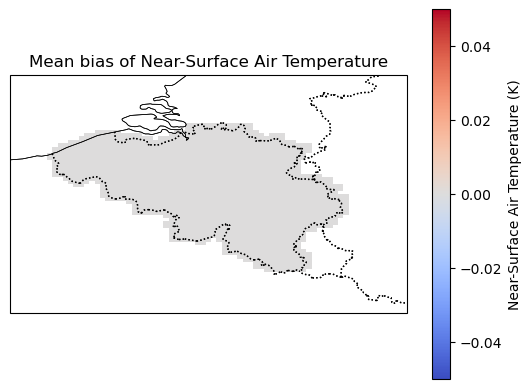

In [38]:
SpatialBias.plot(ds_spatialbias['tas']) #As this is a dask array, nothing is computed until we call the compute method


Nice don't you think? Congrats, you reached the end of a basic valenspy workflow. In the following notebooks we will go into way more details on the functionalities of the different steps. 